## Chapter 11 KNN, K-means, 결정트리

### 11-05 K-means 클러스터링 : 비지도학습

* K-means  알고리즘(K-means  algorithm)은 주어진 n개의 관측값을 k개의 클러스터로 분할하는 알고리즘으로, 관측값들은 거리가 최소인 클러스터로 분류된다. 

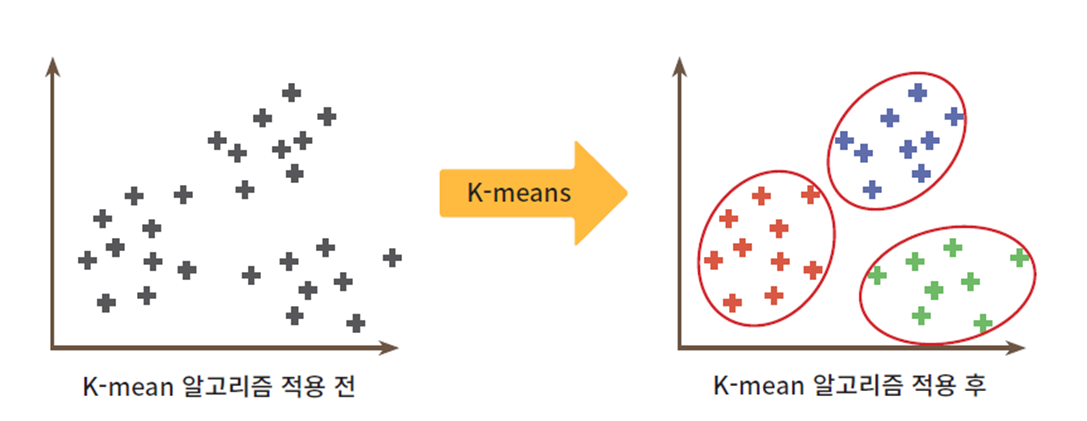

### 11-06 sklearn을 이용한 K-means 클러스터링

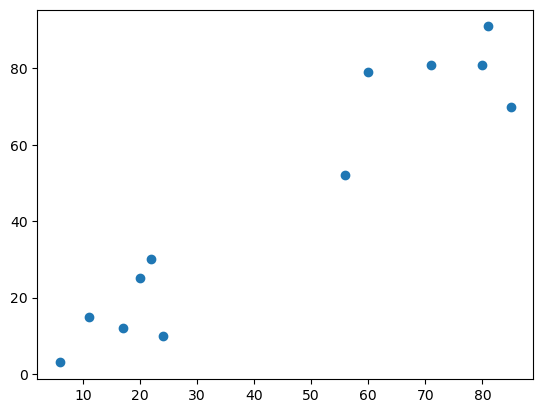

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([
     [6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
     [85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

plt.scatter(X[:,0],X[:,1])
plt.show()

[[72.16666667 75.66666667]
 [16.66666667 15.83333333]]
[1 1 1 1 1 1 0 0 0 0 0 0]


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


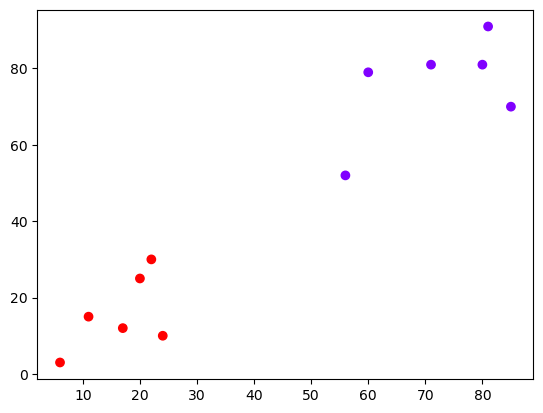

In [2]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

In [3]:
## 각 데이터 포인트가 자기 클러스터 중심과 얼마나 가까운지를 나타내는 총 거리 제곱합
kmeans.inertia_   

2348.333333333333

In [4]:
kmeans.cluster_centers_

array([[72.16666667, 75.66666667],
       [16.66666667, 15.83333333]])

In [5]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [6]:
## labels을 0으로 clustering 한 점과 0번 cluster centroid와의 SSE
sse0 = np.sum((X[kmeans.labels_ == 0] - kmeans.cluster_centers_[0])**2)
## labels을 1으로 clustering 한 점과 1번 cluster centroid와의 SSE
sse1 = np.sum((X[kmeans.labels_ == 1] - kmeans.cluster_centers_[1])**2)
sse0 + sse1

np.float64(2348.333333333333)

#### k를 결정하는 법

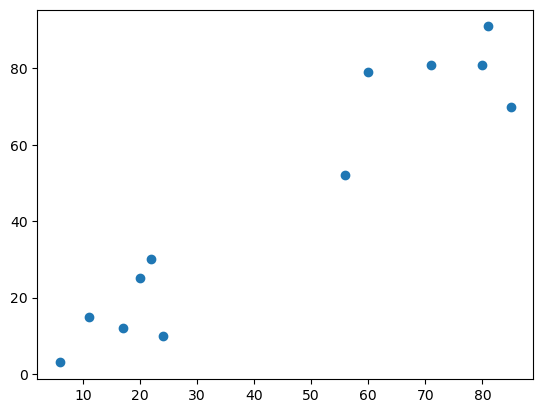

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([
     [6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
     [85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

plt.scatter(X[:,0],X[:,1])


In [8]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [9]:
n_clusters = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in n_clusters]
kmeans


[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

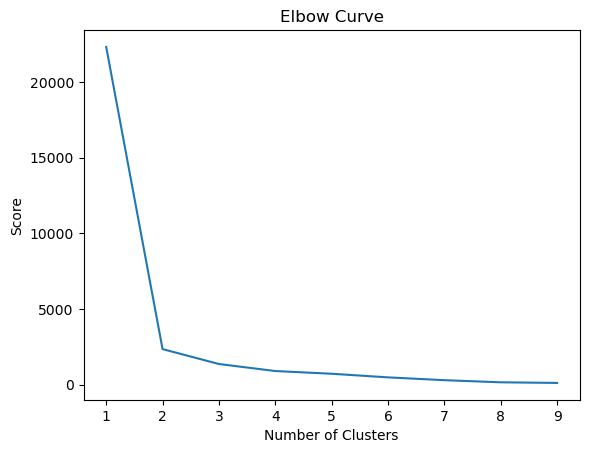

In [10]:

# 모든 샘플에 대하여 제곱 오차를 계산하여 리스트에 추가한다. 
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]

plt.plot(n_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### LAB : K-means 클러스터링 실습

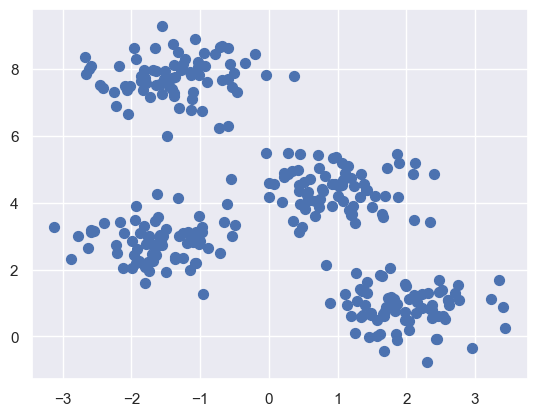

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


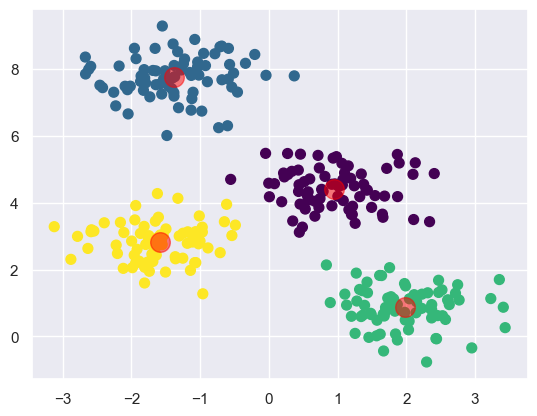

In [12]:

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()

#### 11-07 의사 결정 트리 (Decision Tree)

In [13]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)
clf.predict([[2., 2.]])

array([1])

#### 11-08 예제:의사 결정 트리를 이용한 붓꽃 분류

In [14]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.20)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print("학습 데이터 정확도:", accuracy_score(y_true=y_train, y_pred=y_pred))

학습 데이터 정확도: 1.0


In [15]:
y_pred = clf.predict(X_test)
print("테스트 데이터 정확도:", accuracy_score(y_true=y_test, y_pred=y_test))

테스트 데이터 정확도: 1.0


https://blog.naver.com/learnedu1/222561283182

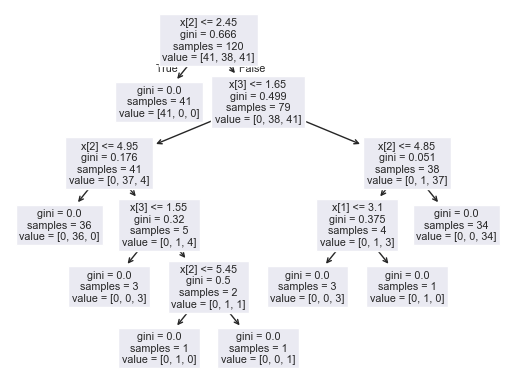

In [16]:
from sklearn.tree import plot_tree
plot_tree(clf)
plt.show()

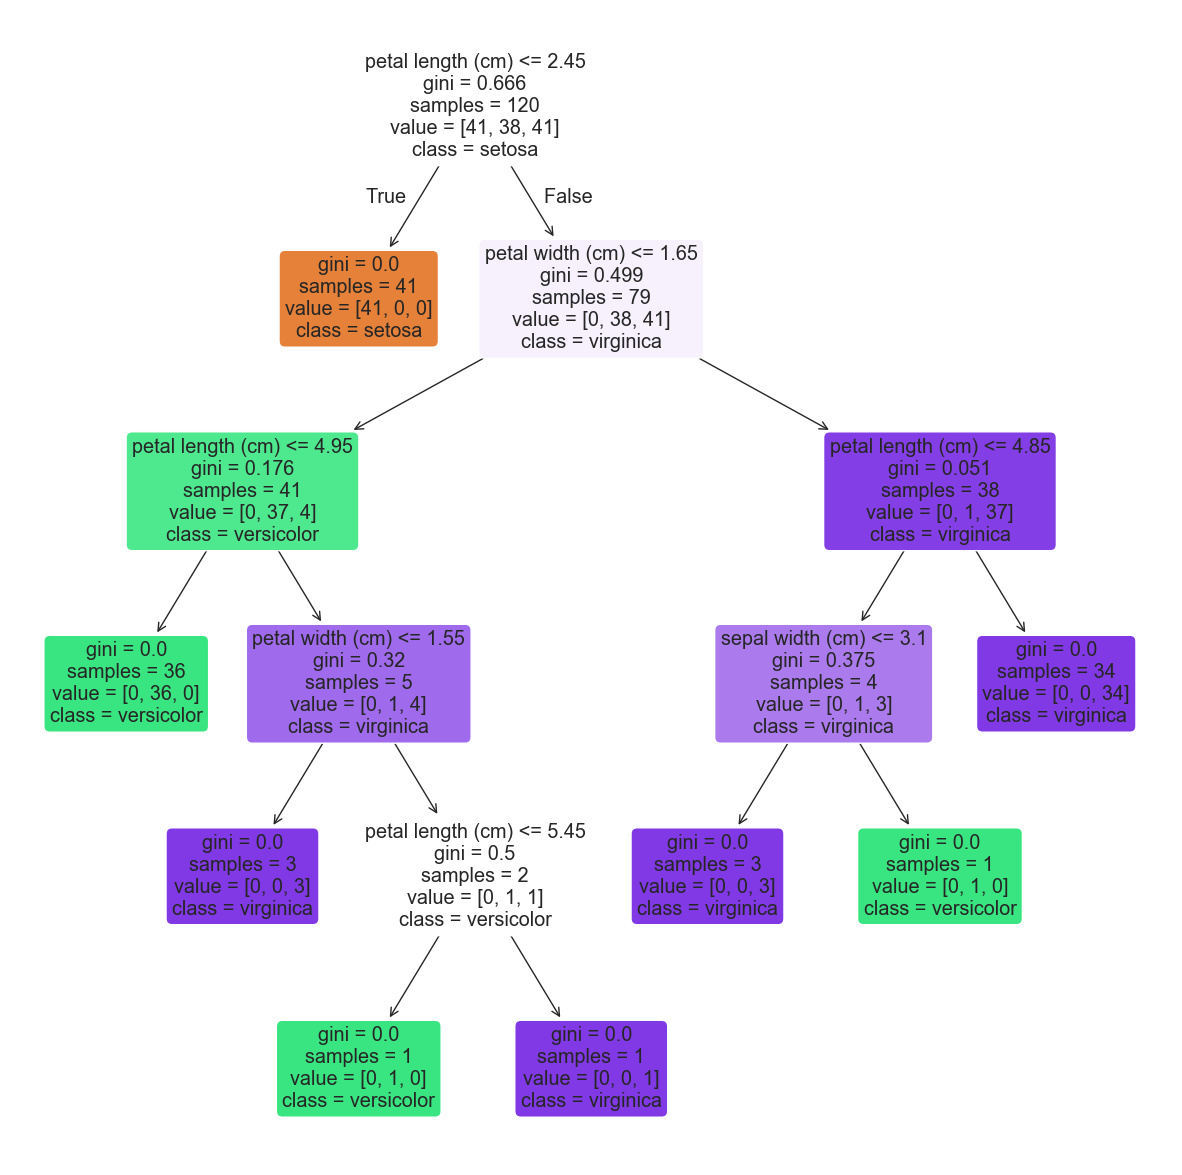

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(
    clf,
    filled=True,                         # 노드에 색상 채움
    rounded=True,                        # 둥근 모양 노드
    feature_names=iris.feature_names,    # 특성 이름
    class_names=iris.target_names        # 클래스 이름
)
plt.show()

In [18]:
# 지니계수 계산법
1 - ((38/79)**2 + (41/79)**2)

0.499278961704855

In [19]:
# !pip install graphviz

In [1]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None)

graph = graphviz.Source(dot_data)
graph.render("iris")    #iris.pdf로 Tree구조가 저장

NameError: name 'clf' is not defined

In [6]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    clf, 
    # out_file=None, 
    feature_names=iris.feature_names,     # 특성 이름 추가
    class_names=iris.target_names,       # 클래스 이름 추가
    filled=True,                          # 색상 채우기
    rounded=True,                         # 둥근 테두리
    special_characters=True               # 특수문자 출력 허용 (예: 공백 등)
)

graph = graphviz.Source(dot_data)
graph.render("iris")  # iris.pdf 파일로 저장됨
graph.view()          # 바로 보기 (선택)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH